## I. Data Cleaning and Preprocessing (for dataset A)

In [5]:
%pip install seaborn

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [29]:
# Read the CSV file into a DataFrame
data_a = pd.read_csv('DataA.csv', index_col=0)

# Print the shape of the DataFrame
print(f"Shape of the DataFrame: {data_a.shape}")

# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
display(data_a.head(5))

Shape of the DataFrame: (19000, 81)

First 5 rows of the DataFrame:


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


### Detect any problems that need to be fixed in dataset A. Report such problems.

In [30]:
# Calculate the total number of missing values in the DataFrame
total_missing_values = data_a.isna().sum().sum()

# Print the total number of missing values
print(f"Total number of missing values: {total_missing_values}")

Total number of missing values: 124053


In [31]:
# Calculate the percentage of missing values for each column
missing_percentage = data_a.isna().mean() * 100

# Filter columns with more than 70% missing values
majority_missing_columns = missing_percentage[missing_percentage > 70]

# Print columns with more than 70% missing values
print("Percentage missing values:")
for column, percentage in majority_missing_columns.items():
    print(f"Column '{column}': {percentage:.2f}% missing")


Percentage missing values:
Column 'fea.34': 99.99% missing
Column 'fea.35': 99.99% missing
Column 'fea.36': 99.99% missing


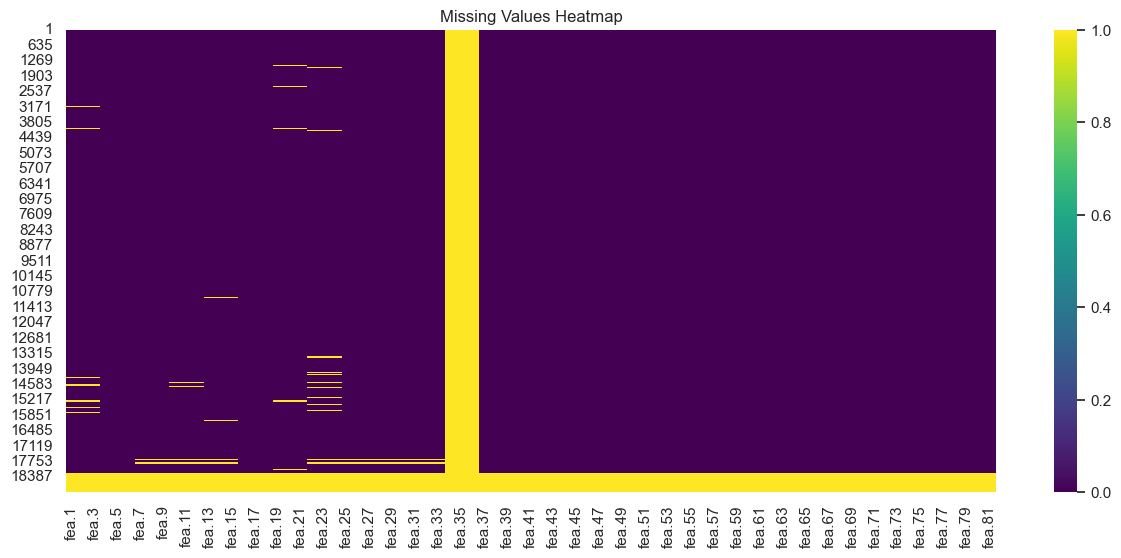

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a heatmap of missing values
sns.heatmap(data_a.isna(), cmap='viridis')

# Add title to the plot
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()


In [33]:
# Calculate the number of missing values in each row
missing_values_per_row = data_a.isna().sum(axis=1)

# Define a threshold for the number of missing values
threshold = 0.7 * len(data_a.columns)  # 70% of total columns

# Filter rows with a lot of missing values based on the threshold
rows_with_a_lot_of_missing_values = data_a[missing_values_per_row > threshold]

# Print information about the filtered DataFrame
print("Filtered DataFrame Information:")
print(f"Number of rows with more than 70% of missing values: {rows_with_a_lot_of_missing_values.shape[0]}")

Filtered DataFrame Information:
Number of rows with more than 70% of missing values: 773


### Fix the detected problems using some of the methods discussed in class.

In [34]:
# Print the shape of the DataFrame before dropping columns with more than threshold 
print('DataFrame shape before dropping columns:', data_a.shape)

# Calculate the threshold for missing values
threshold = 0.7 * data_a.shape[0]  # 70% of the total number of rows

# Drop columns where more than 70% of the data is missing
data_a = data_a.dropna(axis=1, thresh=threshold)

# Print the shape of the DataFrame after dropping columns
print('DataFrame shape after dropping columns:', data_a.shape)

DataFrame shape before dropping columns: (19000, 81)
DataFrame shape after dropping columns: (19000, 78)


In [35]:
# Print the shape of the DataFrame before dropping rows
print('DataFrame shape before dropping rows:', data_a.shape)

# Calculate the threshold for missing values
threshold = 0.7 * data_a.shape[1]  # 70% of the total number of columns

# Drop rows where more than 70% of the data is missing
data_a = data_a.dropna(axis=0, thresh=threshold)

# Print the shape of the DataFrame after dropping rows
print('DataFrame shape after dropping rows:', data_a.shape)

DataFrame shape before dropping rows: (19000, 78)
DataFrame shape after dropping rows: (18205, 78)


In [36]:
data_a = data_a.fillna(data_a.mean())
data_a.isna().any().any()# Fill missing values with the mean of each column
data_a = data_a.fillna(data_a.mean())

# Check if there are any remaining missing values in the DataFrame
missing_values_exist = data_a.isna().any().any()

# Print the result of missing values check
if missing_values_exist:
    print("There are still missing values in the DataFrame after filling with mean values.")
else:
    print("There are no missing values in the DataFrame after filling with mean values.")


There are no missing values in the DataFrame after filling with mean values.


In [37]:
import pandas as pd

def remove_outliers(df):
    """
    Remove outliers from each column of a DataFrame using IQR method.

    Args:
    - df (DataFrame): The input DataFrame containing the data.

    Returns:
    - DataFrame: DataFrame with outliers removed.
    """
    df_out = pd.DataFrame()  # Initialize an empty DataFrame for storing data without outliers
    for col in df.columns:
        # Calculate quartiles and IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Calculate lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Remove outliers and store in the output DataFrame
        df_out[col] = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df_out

# Print the shape of the DataFrame before removing outliers
print("Shape of DataFrame before removing outliers:", data_a.shape)

# Apply the function to remove outliers from the data
data_a = remove_outliers(data_a)

# Print the shape of the resulting DataFrame
print("Shape of DataFrame after removing outliers:", data_a.shape)

Shape of DataFrame before removing outliers: (18205, 78)
Shape of DataFrame after removing outliers: (15738, 78)


### Normalize the data using min-max and z-score normalization. Plot histograms of feature
### 9 and 24; compare and comment on the differences before and after normalization.

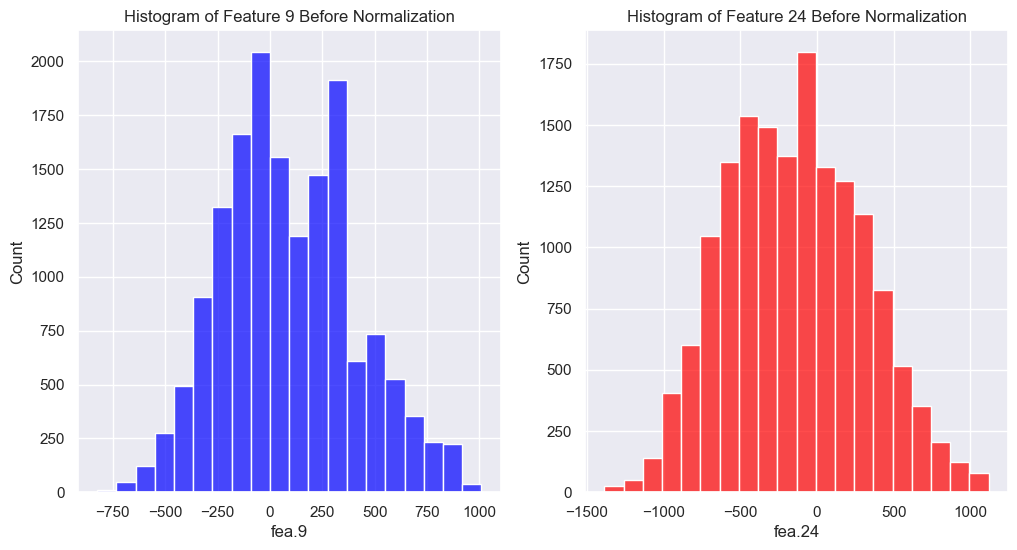

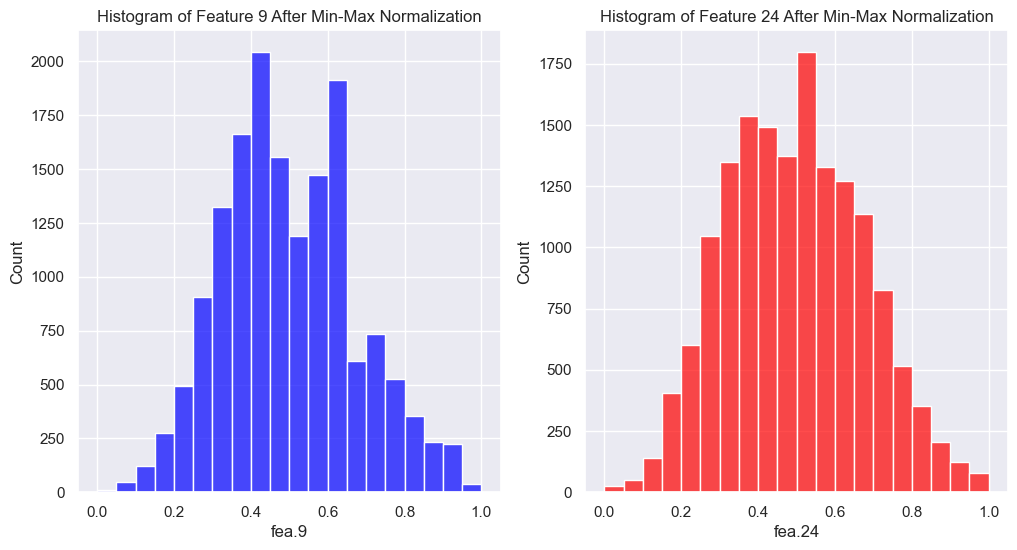

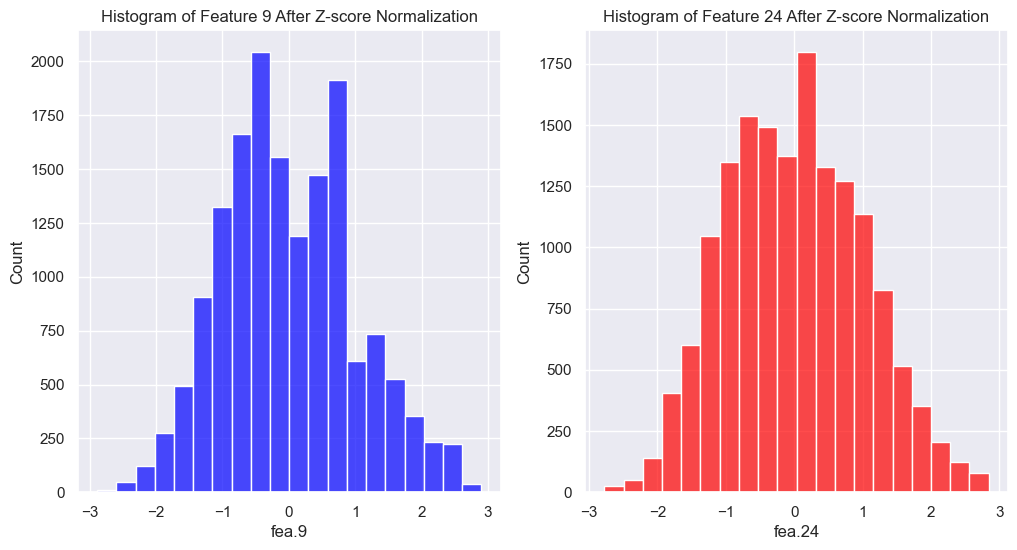

In [38]:
# Select features 9 and 24
features = ['fea.9', 'fea.24']
selected_data = data_a[features]

# Plot histograms of selected features before normalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=selected_data['fea.9'], bins=20, kde=False, color='blue', alpha=0.7)
plt.title('Histogram of Feature 9 Before Normalization')

plt.subplot(1, 2, 2)
sns.histplot(data=selected_data['fea.24'], bins=20, kde=False, color='red', alpha=0.7)
plt.title('Histogram of Feature 24 Before Normalization')

# Apply min-max normalization
min_max_scaler = MinMaxScaler()
min_max_normalized_data = min_max_scaler.fit_transform(selected_data)
min_max_normalized_data = pd.DataFrame(min_max_normalized_data, columns=features)

# Plot histograms of selected features after min-max normalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=min_max_normalized_data['fea.9'], bins=20, kde=False, color='blue', alpha=0.7)
plt.title('Histogram of Feature 9 After Min-Max Normalization')

plt.subplot(1, 2, 2)
sns.histplot(data=min_max_normalized_data['fea.24'], bins=20, kde=False, color='red', alpha=0.7)
plt.title('Histogram of Feature 24 After Min-Max Normalization')

# Apply z-score normalization
z_score_scaler = StandardScaler()
z_score_normalized_data = z_score_scaler.fit_transform(selected_data)
z_score_normalized_data = pd.DataFrame(z_score_normalized_data, columns=features)

# Plot histograms of selected features after z-score normalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=z_score_normalized_data['fea.9'], bins=20, kde=False, color='blue', alpha=0.7)
plt.title('Histogram of Feature 9 After Z-score Normalization')

plt.subplot(1, 2, 2)
sns.histplot(data=z_score_normalized_data['fea.24'], bins=20, kde=False, color='red', alpha=0.7)
plt.title('Histogram of Feature 24 After Z-score Normalization')

plt.show()

### Min-max normalization scales the data to a fixed range (0 to 1), while z-score normalization standardizes the data to have a mean of 0 and a standard deviation of 1

# **II. Feature Extraction (for dataset B)**


**1. Use PCA as a dimensionality reduction technique to the data, compute the eigenvectors andeigenvalues.**

In [64]:
##------Importing necessary libraries

import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [89]:
##------HELPER FUNCTIONS-------##

# Centralize data by subtracting each point from its mean
def mean_subtract(data):
    data_re=data-data.mean()
    return data_re

#Compute the eigenvalues and eigenvectors of the covariance matrix.
def compute_eigenvalues_and_eigenvectors(covariance_matrix):
    eig_val, eig_vec = np.linalg.eig(covariance_matrix)
    return eig_val, eig_vec

# Define a function to plot 2D representations
def plot_2d_representation(df, pc1_col, pc2_col, title,xLabel,yLav):
    sns.set()
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=pc1_col, y=pc2_col, alpha=0.8, s=60,
                    hue="Labels", data=df, palette="Set1")
    plt.title(title)
    plt.xlabel(pc1_col)
    plt.ylabel(pc2_col)
    plt.legend(title='Digits')
    plt.show()

In [133]:
# Load Dataset B and Display the first 5 rows
data_b = pd.read_csv('DataB.csv')
print("\nFirst 5 rows of the original DataFrame:")
data_b.head()


First 5 rows of the original DataFrame:


,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0


In [134]:
#Extract the Labels variable and drop unnecessary column(Unnamed)
label = data_b.pop('gnd')
data_b.drop('Unnamed: 0', axis=1, inplace=True)

data_b.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1


In [135]:
# Centralize the data by subtracting the mean
data_b = mean_subtract(data_b)

#Display the first few rows of the modified DataFrame
print("\nFirst 5 rows of the centralised Data:")
data_b.head()


First 5 rows of the centralised Data:


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.491772,1.452565,0.539206,-2.496612,-2.472894,1.509681,-0.486447,-1.512585,1.477735,-1.482091,...,-1.517909,-1.469506,0.477251,-2.486447,1.550339,-0.498064,-1.525653,-1.54211,1.59971,2.480639
1,2.491772,-1.547435,1.539206,0.503388,-1.472894,0.509681,2.513553,-1.512585,1.477735,1.517909,...,0.482091,-1.469506,-1.522749,0.513553,0.550339,-1.498064,0.474347,0.45789,2.59971,1.480639
2,-1.508228,0.452565,-2.460794,0.503388,-1.472894,-1.490319,-2.486447,-1.512585,-2.522265,-0.482091,...,1.482091,0.530494,-2.522749,-0.486447,1.550339,-0.498064,-0.525653,-1.54211,-0.40029,1.480639
3,2.491772,0.452565,-0.460794,0.503388,2.527106,-0.490319,-0.486447,-2.512585,1.477735,2.517909,...,1.482091,2.530494,1.477251,2.513553,-1.449661,1.501936,1.474347,-0.54211,1.59971,1.480639
4,0.491772,2.452565,0.539206,0.503388,-2.472894,1.509681,-1.486447,-1.512585,1.477735,0.517909,...,-1.517909,-1.469506,0.477251,0.513553,0.550339,-1.498064,-0.525653,1.45789,-1.40029,-1.519361


***Eigen Values and Eigen Vectors***

In [136]:
# Data Matrix
X = np.asmatrix(data_b)

#Covariance Matrix
covariance_matrix = np.cov(X.T)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = compute_eigenvalues_and_eigenvectors(covariance_matrix)

print("\nFirst 5 eigenvalues and  eigenvectors")
print(eigenvalues[:5])

print("\nFirst 5 eigenvectors")
print(eigenvectors[:5])


First 5 eigenvalues and  eigenvectors
[467242.20654187 278894.14551396 213480.28383713 205514.15361983
 171638.86922982]

First 5 eigenvectors
[[ 3.61067274e-05 -4.10014533e-05 -4.90102245e-05 ...  3.97013571e-02
   9.22625091e-03 -4.15737479e-04]
 [ 1.88873948e-05 -2.61454773e-05 -1.02341601e-05 ...  4.09562800e-02
  -5.85006343e-02 -1.05865531e-01]
 [-1.22686065e-05  7.18534632e-05  5.14355609e-05 ... -1.94223490e-02
  -4.19090873e-02  4.99932146e-02]
 [-5.56406378e-05  1.63914228e-05 -1.26201422e-06 ... -7.57346198e-02
  -2.31299848e-02 -3.09318585e-02]
 [ 4.97588582e-06 -2.23285914e-05 -1.03604431e-04 ...  6.81515606e-02
   9.84352789e-03 -7.18517435e-02]]


Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method. In other words, it tells us how much of the total variance is “explained” by each component. Reference: https://vitalflux.com/pca-explained-variance-concept-python-example

We will plot the above measure for the top 20 variances in the below cell.

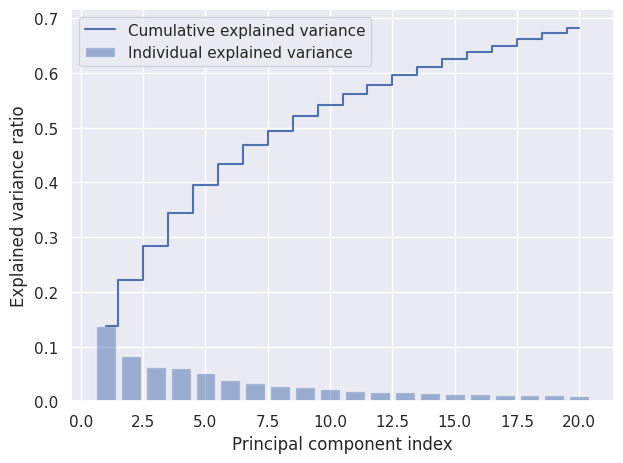

In [137]:
# Calculate explained variance ratio
explained_variance = eigenvalues / np.sum(eigenvalues)
cum_sum_exp = np.cumsum(explained_variance)
# plt.plot(np.arange(0, 50), explained_variance_ratio[:50], marker='o')
plt.bar(range(1,21), explained_variance[:20], alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,21), cum_sum_exp[:20], where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()                    

**2. Plot a 2 dimensional representation of the data points based on the first and second principal components. Explain the results versus the known classes (display data points of each class with a different color).**

In [138]:
#Selecting only first 2 principal Components
V = np.asmatrix(eigenvectors[:,:2])
#Projecting original data points on to 2 Principal components
Y_12 = np.dot(V.T, X.T)
Y_12 = Y_12.T
Y_12.shape

(2066, 2)

In [139]:
# Create a DataFrame from the projected data Y_12

df_reduced12 = pd.DataFrame(Y_12, columns=['Projection on PC 1', 'Projection on PC 2'])
df_reduced12['Labels'] = label
df_reduced12.head()

,Projection on PC 1,Projection on PC 2,Labels
0,1069.166304,513.973184,0
1,1099.176077,570.842223,0
2,673.201385,167.377150,0
3,1010.903339,187.044145,0
4,1692.970822,633.369398,0


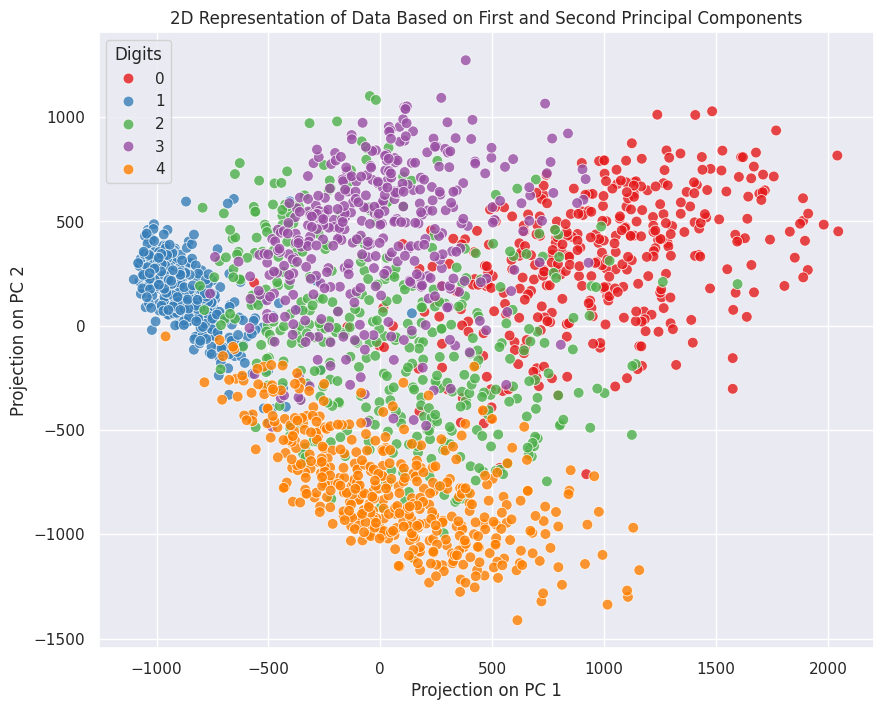

In [140]:
# Plot 2D representation based on the first and second principal components
plot_2d_representation(df_reduced12, "Projection on PC 1", "Projection on PC 2",
                       "2D Representation of Data Based on First and Second Principal Components",
                      "Principal Component 1", "Principal Component 2")

**Answer 3: Comment on the result.**
The scatter plot illustrates a 2-D representation of handwritten digits (0-4).
The plot shows that there is a visible separation between digits highlighted by different colours but also some overlap. 
For example, clusters for digits 2 and 3 (green and purple) have a somewhat similar shape and we can reasonably say there is overlapping.
Hence there is partial separation which means some variation is captured, but not enough for very clear differentiation. Overlapping Digits can be due to shared features leading to overlap, making class boundaries ambiguous.
We can see that unsupervised PCA offers insights into digit layout, but struggles to clearly distinguish between classes due to overlap.

**3. Repeat step 2 for the 5th and 6st components. Comment on the result.**

In [141]:
#Selecting top 5,6 Prinipal components:
U_56 = eigenvectors[:,4:6]

#Projecting original dataset over first two components:
Y_56 = np.dot(U_56.T,X.T)

#Transposing Y matrix to n by 2:
Y_56=Y_56.T
Y_56.shape

(2066, 2)

In [142]:
# Create a DataFrame from the projected data Y_56
df_reduced56 = pd.DataFrame(Y_56)
df_reduced56.columns = ['Projection on PC 5','Projection on PC 6']
df_reduced56['Labels'] = label
df_reduced56.head()


,Projection on PC 5,Projection on PC 6,Labels
0,-387.873484,-335.304982,0
1,-345.573249,-530.737220,0
2,-1036.833666,76.531663,0
3,-901.897549,73.661148,0
4,6.919257,-601.851221,0


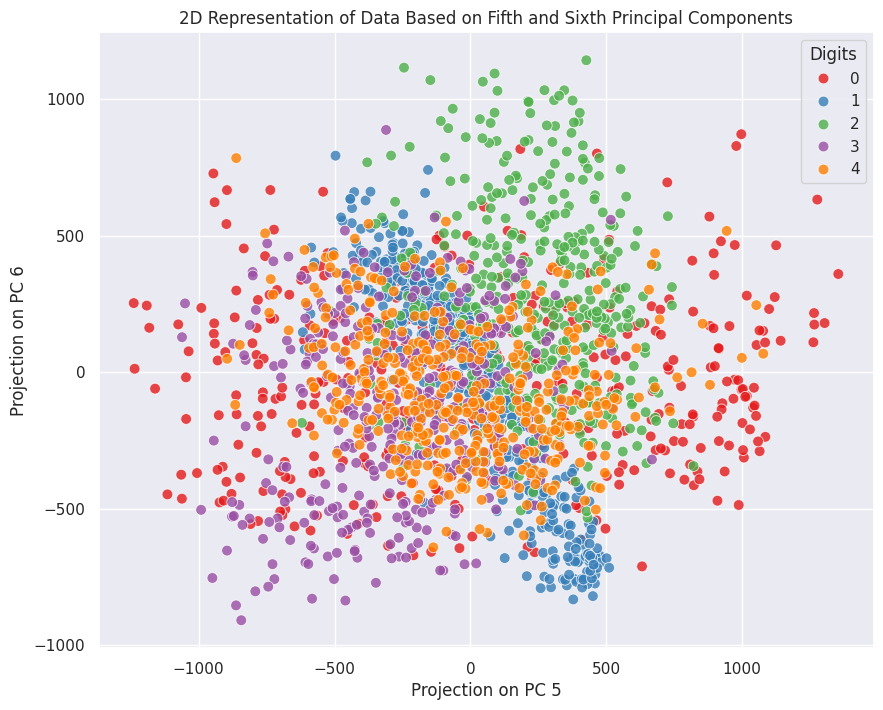

In [143]:
# Plot 2D representation based on the fifth and sixth principal components

plot_2d_representation(df_reduced56, "Projection on PC 5", "Projection on PC 6",
                       "2D Representation of Data Based on Fifth and Sixth Principal Components",
                       "Principal Component 5", "Principal Component 6")

**Ans 3: Comment on result**
The scatter plot based on the 5th and 6th principal components displays a higher degree of overlap between classes than the plot based on the 1st and 2nd principal components, overlaps are particularly evident in the central region of the plot.
This indicates that the 5th and 6th principal components fail to effectively separate the classes as they do not capture the essential discriminative features, or capture much variance, unlike the 1st and 2nd pricipal component. As a result, the reduced-dimensional space defined by these components lacks the clarity and distinction observed in the plot using the first two principal components.

**4. Use the Naive Bayes classifier to classify 8 sets of dimensionality reduced data (using the first 2, 4, 10, 30, 60, 200, 500, and all 784 PCA components). Plot the classification error for the 8 sets against the retained variance of each case.**

In [151]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Preprocess the data by splitting it into training and testing sets.
def preprocess_data(X, y, test_size=0.3, random_state=412):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test
    
#Project the original data onto the selected principal components.
def project_pca(X, eigenvectors, num_components):
    V = eigenvectors[:, :num_components]
    Y = np.dot(V.T, X.T)
    retained_variance = np.sum(eigenvalues[:num_components]) / np.sum(eigenvalues)
    return pd.DataFrame(Y.T), retained_variance

#Train a Naive Bayes classifier.
def train_naive_bayes(X_train, y_train):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    return gnb

#Evaluate the trained model on both training and testing sets.
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_error = (1 - metrics.accuracy_score(y_train, y_train_pred))
    test_error = (1 - metrics.accuracy_score(y_test, y_test_pred))
    return train_error, test_error
    
def NaiveBayesClassifier(num_components, eigenvectors,data_matrix,labels): 
    df_reduced, retained_variance = project_pca(data_matrix, eigenvectors, num_components) 
    X_train, X_test, y_train, y_test = preprocess_data(df_reduced, labels)
    model = train_naive_bayes(X_train, y_train)
    train_error, test_error = evaluate_model(model, X_train, X_test, y_train, y_test)
    return retained_variance, test_error, train_error  

#Plot error rates vs. retained variance
def plot_error_vs_variance(df_final):
    plt.figure(figsize=(10, 6))
    plt.plot(df_final['Retained Variance'], df_final['Prediction Error Test'],marker='o',markersize=8, label='Test Error')
    plt.plot(df_final['Retained Variance'], df_final['Prediction Error Train'],marker='s', label='Train Error')
    plt.title('Error Rates vs. Retained Variance')
    plt.xlabel('Retained Variance')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

In [150]:
#Compute the metrics for Naive Bayes classifier with different numbers of principal components.

final_results = []
components = [2, 4, 10, 30, 60, 200, 500, 784]
data_matrix = np.asmatrix(data_b)

# Perform classification with different numbers of components
for num_components in components:
    retained_variance, test_error, train_error = NaiveBayesClassifier(num_components, eigenvectors,data_matrix,label)
    final_results.append({'Retained Variance': retained_variance, 'Prediction Error Test': test_error,'Prediction Error Train': train_error})


# Create DataFrame to store results
df_final = pd.DataFrame(final_results)
print(df_final)

   Retained Variance  Prediction Error Test  Prediction Error Train
0           0.220865               0.225806                0.242739
1           0.344893               0.153226                0.159751
2           0.542222               0.064516                0.076072
3           0.761456               0.053226                0.062241
4           0.872759               0.059677                0.048409
5           0.975108               0.100000                0.062932
6           0.999751               0.253226                0.177040
7           1.000000               0.341935                0.199170


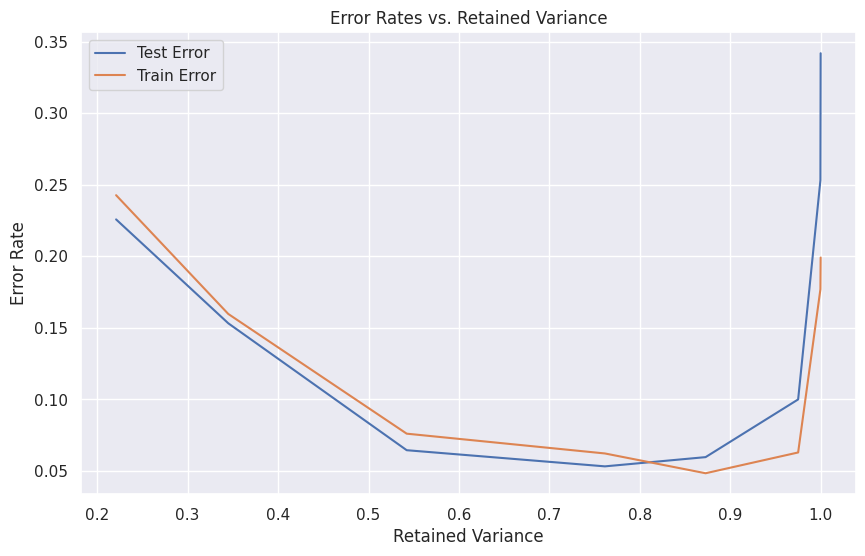

In [146]:
plot_error_vs_variance(df_final)

**5. As the class labels are already known, you can use the Linear Discriminant Analysis (LDA)to reduce the dimensionality, plot the data points using the first 2 LDA components (display data points of each class with a different color). Explain the results obtained in terms of the known classes. Compare with the results obtained by using PCA.**

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate and fit LDA
clf = LinearDiscriminantAnalysis(n_components=2)
lda_components = clf.fit_transform(data_b, label)

# Create DataFrame for LDA components
df_lda = pd.DataFrame(lda_components, columns=['LDA Component 1', 'LDA Component 2'])
df_lda['Labels'] = label


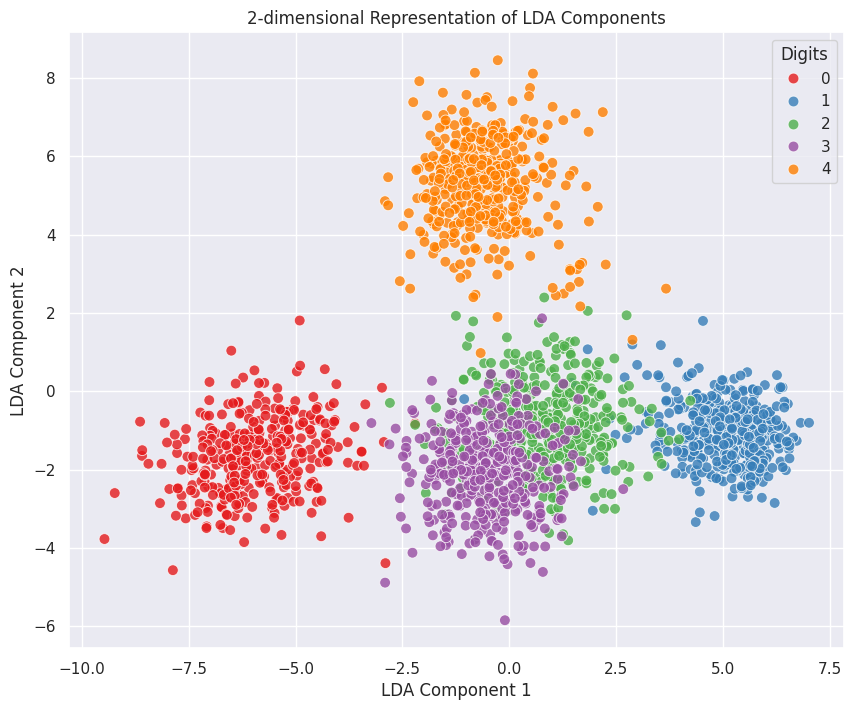

In [63]:
# Plot LDA components
plot_2d_representation(df_lda, 'LDA Component 1', 'LDA Component 2', 
                       '2-dimensional Representation of LDA Components',
                       "LDA Component 1" , "LDA Component 2")

**Answer 5 Explain the results obtained in terms of the known classes. Compare with the results obtained by using PCA**

The scatter graph made using the LDA components 1 and 2 shows better clusters for different classes. And each class of the digits is well separated.

The above separate clusters representing the digits(0-4) in the LDA plot show that the classes are much more distinguishable compared to the principal component analysis (PCA) graph. This improved distinguishability stems from the main principles of LDA, which aim to maximize the space between categories while minimizing the distance between points of the same class.

In contrast, PCA works on a different scale by focusing on maximizing the data's variability without considereing the classes. While PCA can also reveal patterns and structures in the data, it is not able to optimize class separability as effectively as LDA.

**6. Prove that the PCA is the best linear method for transformation (with orthonormal
bases)**